# 자연어 전처리 실습

> 작성자      
```
* 김성현 (bananaband657@gmail.com)  
1기 멘토
김바다 (qkek983@gmail.com)
박상희 (parksanghee0103@gmail.com)  
이정우 (jungwoo.l2.rs@gmail.com)
2기 멘토
박상희 (parksanghee0103@gmail.com)  
이정우 (jungwoo.l2.rs@gmail.com)
이녕우 (leenw2@gmail.com)
박채훈 (qkrcogns2222@gmail.com)
```
[CC BY-NC-ND](https://creativecommons.org/licenses/by-nc-nd/2.0/kr/)


## 전처리를 위한 코퍼스 수집

자연어 전처리 실습을 위해, 먼저 뉴스 기사를 크롤링해보도록 하겠습니다.   
일반적으로 크롤링 코드를 작성하려면 많은 요소들을 고려해야합니다.   
본 실습에서는 url 정보만 입력해주면 텍스트를 추출해주는 [라이브러리](https://github.com/codelucas/newspaper)를 사용하도록 하겠습니다.      

In [1]:
!pip install newspaper3k #이 library를 쓰면 뉴스기사에서 제목과 컨텐츠를 알아서 따로 분리 후 크롤링 해온다 

     |████████████████████████████████| 211 kB 6.9 MB/s 
     |████████████████████████████████| 81 kB 6.0 MB/s 
     |████████████████████████████████| 7.4 MB 27.4 MB/s 
     |████████████████████████████████| 87 kB 7.0 MB/s 
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13552 sha256=1c65869601bf856c4d51017c9e63ab1e63740c14d6c871ade9e9d2a1854245c9
  Stored in directory: /root/.cache/pip/wheels/df/67/41/faca10fa501ca010be41b49d40360c2959e1c4f09bcbfa37fa
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3356 sha256=5d32d2b8603e7e48769ed29892f36c67674f0cbf6aab94563b51138831326798
  Stored in directory: /root/.cache/pip/wheels/7f/d4/8f/6e2ca54744c9d7292d88ddb8d42876bcdab5e6d84a21c10346
  Created wheel for jieba3k: filename=jieba3k-0.35.1-py3-none-any.whl size=7398405 sha256=0e93bb1ebdabe2d35641b06441cead6d7c52da3796d4051106812931e5acb894
  Stored in directory: /root/.cache/pip/wheels/4c/91/46/3c208287b726df325a597957432

newspaper 라이브러리는 매우 많은 언어에 대한 크롤링을 지원해주며, 아래 명령어로 확인할 수 있습니다.

In [2]:
import newspaper
newspaper.languages()


Your available languages are:

input code		full name
  en			  English
  et			  Estonian
  bg			  Bulgarian
  mk			  Macedonian
  he			  Hebrew
  fi			  Finnish
  ru			  Russian
  pt			  Portuguese
  it			  Italian
  de			  German
  no			  Norwegian
  da			  Danish
  zh			  Chinese
  ja			  Japanese
  es			  Spanish
  id			  Indonesian
  ro			  Romanian
  tr			  Turkish
  pl			  Polish
  be			  Belarusian
  vi			  Vietnamese
  el			  Greek
  ko			  Korean
  sl			  Slovenian
  nl			  Dutch
  hu			  Hungarian
  sv			  Swedish
  uk			  Ukrainian
  hi			  Hindi
  fa			  Persian
  sr			  Serbian
  fr			  French
  hr			  Croatian
  ar			  Arabic
  nb			  Norwegian (Bokmål)
  sw			  Swahili



뉴스를 바로 크롤링해보도록 하겠습니다.   
일반적으로 뉴스 기사의 경우, 재배포 역시 저작권에 위반되기 때문에, 매우 주의하셔야 합니다.   
본 실습에서는 저작권에서 비교적 자유로운 위키트리 뉴스 데이터를 사용하도록 하겠습니다.   

In [3]:
news_url = "https://www.wikitree.co.kr/articles/252931"
# context = "이하 뉴스1&인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단\n\n\
# 이하 뉴스1\n\n\
# 인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단의 사진이 화제다.\n\n\
# 13일 서울 광화문 포시즌스 호텔에서 열린 '구글 딥마인드 챌린지 매치'에서 이세돌 9단은 알파고와의 제4국에서 승리했다. 이날 대국장을 빠져나가는 이세돌 9단의 모습이 사진에 포착됐다.\n\n\
# 이세돌 9단은 상의 주머니에 양손을 넣고 옅은 미소를 지었다. 이 사진은 SNS에서 화제를 모았다.\n\n\
# 오늘 알파고에게 승리하고 대국장 빠져나가는 이세돌이라는데ㅋㅋㅋㅋㅋㅋㅋ 포토제닉ㅋㅋㅋㅋㅋㅋㅋ 이대로 헐리웃 영화 만들어지고 포스터 소취요 pic.twitter.com/4IRFJu18hx — 조드윅 앓는 서린 (@katharine_stark) 2016년 3월 13일\n\n\
# 대국을 마친 뒤, 이세돌 9단은 \"한판 이겼는데 이렇게까지 축하를 받아보는 것은 처음\"이라고 말했다. 이세돌 9단은 기자회견장에도 함박 웃음을 감추지 못했다."

In [4]:
from newspaper import Article

In [5]:
article = Article(news_url, language='ko')

In [6]:
article.download()
article.parse()

print('title:', article.title)

print('context:', article.text)


title: 알파고에 첫승 거두고 미소짓는 이세돌 사진
context: 이하 뉴스1&인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단

이하 뉴스1

인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단의 사진이 화제다.

13일 서울 광화문 포시즌스 호텔에서 열린 '구글 딥마인드 챌린지 매치'에서 이세돌 9단은 알파고와의 제4국에서 승리했다. 이날 대국장을 빠져나가는 이세돌 9단의 모습이 사진에 포착됐다.

이세돌 9단은 상의 주머니에 양손을 넣고 옅은 미소를 지었다. 이 사진은 SNS에서 화제를 모았다.

오늘 알파고에게 승리하고 대국장 빠져나가는 이세돌이라는데ㅋㅋㅋㅋㅋㅋㅋ 포토제닉ㅋㅋㅋㅋㅋㅋㅋ 이대로 헐리웃 영화 만들어지고 포스터 소취요 pic.twitter.com/4IRFJu18hx — 조드윅 앓는 서린 (@katharine_stark) 2016년 3월 13일

대국을 마친 뒤, 이세돌 9단은 "한판 이겼는데 이렇게까지 축하를 받아보는 것은 처음"이라고 말했다. 이세돌 9단은 기자회견장에도 함박 웃음을 감추지 못했다.


추가적인 전처리 실습을 위해, 뉴스에서 많이 포함되는 예제 텍스트를 임의로 추가하도록 하겠습니다.

In [7]:
context = article.text.split('\n')
context.append("<h1>여기에 태그가 있네요!</h1> <h3>이곳에도 태그가 있구요</h3> html은 <b>태그</b>로 이루어진 문서입니다. 텍스트를 <b>진하게</b> 만들 수도 있고, <u>밑줄</u>을 칠 수도 있습니다. ‘<br>이 줄은 실제 뉴스(news,)에 포함되지 않은 임시 데이터임을 알립니다…<br>‘")
context.append("(서울=위키트리) 김성현 기자 (seonghkim@smilegate.com) <저작권자(c) 무단전재-재배포 금지> ‘<br>이 줄은 실제 뉴스(news,)에 포함되지 않은 임시 데이터임을 알립니다…<br>‘")
context.append("(사진=위키트리, 무단 전재-재배포 금지) ‘<br>이 줄은 실제 뉴스(news,)에 포함되지 않은 임시 데이터임을 알립니다…<br>‘")
context.append("#이세돌 #알파고 #인공지능 #딥러닝 #바둑")


In [8]:
for i, sent in enumerate(context):
    print(i, sent)

0 이하 뉴스1&인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단
1 
2 이하 뉴스1
3 
4 인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단의 사진이 화제다.
5 
6 13일 서울 광화문 포시즌스 호텔에서 열린 '구글 딥마인드 챌린지 매치'에서 이세돌 9단은 알파고와의 제4국에서 승리했다. 이날 대국장을 빠져나가는 이세돌 9단의 모습이 사진에 포착됐다.
7 
8 이세돌 9단은 상의 주머니에 양손을 넣고 옅은 미소를 지었다. 이 사진은 SNS에서 화제를 모았다.
9 
10 오늘 알파고에게 승리하고 대국장 빠져나가는 이세돌이라는데ㅋㅋㅋㅋㅋㅋㅋ 포토제닉ㅋㅋㅋㅋㅋㅋㅋ 이대로 헐리웃 영화 만들어지고 포스터 소취요 pic.twitter.com/4IRFJu18hx — 조드윅 앓는 서린 (@katharine_stark) 2016년 3월 13일
11 
12 대국을 마친 뒤, 이세돌 9단은 "한판 이겼는데 이렇게까지 축하를 받아보는 것은 처음"이라고 말했다. 이세돌 9단은 기자회견장에도 함박 웃음을 감추지 못했다.
13 <h1>여기에 태그가 있네요!</h1> <h3>이곳에도 태그가 있구요</h3> html은 <b>태그</b>로 이루어진 문서입니다. 텍스트를 <b>진하게</b> 만들 수도 있고, <u>밑줄</u>을 칠 수도 있습니다. ‘<br>이 줄은 실제 뉴스(news,)에 포함되지 않은 임시 데이터임을 알립니다…<br>‘
14 (서울=위키트리) 김성현 기자 (seonghkim@smilegate.com) <저작권자(c) 무단전재-재배포 금지> ‘<br>이 줄은 실제 뉴스(news,)에 포함되지 않은 임시 데이터임을 알립니다…<br>‘
15 (사진=위키트리, 무단 전재-재배포 금지) ‘<br>이 줄은 실제 뉴스(news,)에 포함되지 않은 임시 데이터임을 알립니다…<br>‘
16 #이세돌 #알파고 #인공지능 #딥러닝 #바둑


HTML 테크가 무분별하게 부착되어 있네요 :-)
먼저 테그부터 제거해보도록 하겠습니다.

In [9]:
import re

In [10]:
def remove_html(texts):
    """
    HTML 태그를 제거합니다.
    ``<p>안녕하세요 ㅎㅎ </p>`` -> ``안녕하세요 ㅎㅎ ``
    """
    preprcessed_text = []
    for text in texts:
        text = re.sub(r"<[^>]+>\s+(?=<)|<[^>]+>", "", text).strip()
        if text:
            preprcessed_text.append(text)
    return preprcessed_text

In [11]:
context = remove_html(context)
for i, sent in enumerate(context):
    print(i, sent)

0 이하 뉴스1&인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단
1 이하 뉴스1
2 인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단의 사진이 화제다.
3 13일 서울 광화문 포시즌스 호텔에서 열린 '구글 딥마인드 챌린지 매치'에서 이세돌 9단은 알파고와의 제4국에서 승리했다. 이날 대국장을 빠져나가는 이세돌 9단의 모습이 사진에 포착됐다.
4 이세돌 9단은 상의 주머니에 양손을 넣고 옅은 미소를 지었다. 이 사진은 SNS에서 화제를 모았다.
5 오늘 알파고에게 승리하고 대국장 빠져나가는 이세돌이라는데ㅋㅋㅋㅋㅋㅋㅋ 포토제닉ㅋㅋㅋㅋㅋㅋㅋ 이대로 헐리웃 영화 만들어지고 포스터 소취요 pic.twitter.com/4IRFJu18hx — 조드윅 앓는 서린 (@katharine_stark) 2016년 3월 13일
6 대국을 마친 뒤, 이세돌 9단은 "한판 이겼는데 이렇게까지 축하를 받아보는 것은 처음"이라고 말했다. 이세돌 9단은 기자회견장에도 함박 웃음을 감추지 못했다.
7 여기에 태그가 있네요!이곳에도 태그가 있구요 html은 태그로 이루어진 문서입니다. 텍스트를 진하게 만들 수도 있고, 밑줄을 칠 수도 있습니다. ‘이 줄은 실제 뉴스(news,)에 포함되지 않은 임시 데이터임을 알립니다…‘
8 (서울=위키트리) 김성현 기자 (seonghkim@smilegate.com)  ‘이 줄은 실제 뉴스(news,)에 포함되지 않은 임시 데이터임을 알립니다…‘
9 (사진=위키트리, 무단 전재-재배포 금지) ‘이 줄은 실제 뉴스(news,)에 포함되지 않은 임시 데이터임을 알립니다…‘
10 #이세돌 #알파고 #인공지능 #딥러닝 #바둑


## 문장 분리

문장 단위로 모델이 학습하도록 유도하기 위해, 문장 분리를 먼저 해주겠습니다.  

한국어 문장분리기 중, 가장 성능이 우수한 것으로 알려진 [kss 라이브러리](https://github.com/hyunwoongko/kss)를 사용하도록 하겠습니다.

In [12]:
!pip install kss # 한국어의 문장 분리 규칙들을 다 라이브러리화 했다

     |████████████████████████████████| 42.4 MB 56 kB/s 
     |████████████████████████████████| 185 kB 63.6 MB/s 
  Created wheel for kss: filename=kss-3.2.0-py3-none-any.whl size=42447995 sha256=3cadb11b9f47813786746c899342ed2f4ab3989864ca8572b1c84dea804ea5ed
  Stored in directory: /root/.cache/pip/wheels/a1/47/9c/a5f83b5ab6096e3c4a33643fc553b26098c23e72b6539b86f4
  Created wheel for emoji: filename=emoji-1.5.0-py3-none-any.whl size=187457 sha256=7b91465aa30e734619e8c0f7477d6d7f8dd7c621e098e89e49349843e34a03b5
  Stored in directory: /root/.cache/pip/wheels/db/b5/f6/b39abf14e94b3d6640613bbe630a66c10ccf7a12882d064fb5
Successfully built kss emoji


In [13]:
import kss

[Korean Sentence Splitter]: Initializing Kss...


In [19]:
sents = []

for sent in context:
    sent = sent.strip()
    if sent:
        splited_sent = kss.split_sentences(sent)#kss.split_senteces하면 입력된 문장이 자동으로 분리된다
        sents.extend(splited_sent)

In [20]:
for i, sent in enumerate(sents):
    print(i, sent)

0 이하 뉴스1&인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단
1 이하 뉴스1
2 인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단의 사진이 화제다.
3 13일 서울 광화문 포시즌스 호텔에서 열린 '구글 딥마인드 챌린지 매치'에서 이세돌 9단은 알파고와의 제4국에서 승리했다.
4 이날 대국장을 빠져나가는 이세돌 9단의 모습이 사진에 포착됐다.
5 이세돌 9단은 상의 주머니에 양손을 넣고 옅은 미소를 지었다.
6 이 사진은 SNS에서 화제를 모았다.
7 오늘 알파고에게 승리하고 대국장 빠져나가는 이세돌이라는데ㅋㅋㅋㅋㅋㅋㅋ 포토제닉ㅋㅋㅋㅋㅋㅋㅋ 이대로 헐리웃 영화 만들어지고 포스터 소취요 pic.twitter.com/4IRFJu18hx — 조드윅 앓는 서린 (@katharine_stark) 2016년 3월 13일
8 대국을 마친 뒤, 이세돌 9단은 "한판 이겼는데 이렇게까지 축하를 받아보는 것은 처음"이라고 말했다.
9 이세돌 9단은 기자회견장에도 함박 웃음을 감추지 못했다.
10 여기에 태그가 있네요!
11 이곳에도 태그가 있구요
12 html은 태그로 이루어진 문서입니다.
13 텍스트를 진하게 만들 수도 있고, 밑줄을 칠 수도 있습니다. ‘이 줄은 실제 뉴스(news,)에 포함되지 않은 임시 데이터임을 알립니다…‘
14 (서울=위키트리) 김성현 기자 (seonghkim@smilegate.com) ‘이 줄은 실제 뉴스(news,)에 포함되지 않은 임시 데이터임을 알립니다…‘
15 (사진=위키트리, 무단 전재-재배포 금지) ‘이 줄은 실제 뉴스(news,)에 포함되지 않은 임시 데이터임을 알립니다…‘
16 #이세돌 #알파고 #인공지능 #딥러닝 #바둑


눈으로 확인해보니 데이터가 매우 불-편하네요 :-)   
이제 본문에서 제거가 필요한 요소들을 확인해볼 수 있습니다.   

## Normalizing

In [21]:
def remove_email(texts):
    """
    이메일을 제거합니다.#웹에서 긁어 오면 이메일 같은 개인정보도 크롤링 하는 경우가 ㅠㅠ -> 반드시 제거해줘야
    ``홍길동 abc@gmail.com 연락주세요!`` -> ``홍길동  연락주세요!``
    """
    preprocessed_text = []
    for text in texts:
        text = re.sub(r"[a-zA-Z0-9+-_.]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+", "", text).strip()
        if text:
            preprocessed_text.append(text)
    return preprocessed_text

In [22]:
sents = remove_email(sents)
for i, sent in enumerate(sents):
    print(i, sent)

0 이하 뉴스1&인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단
1 이하 뉴스1
2 인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단의 사진이 화제다.
3 13일 서울 광화문 포시즌스 호텔에서 열린 '구글 딥마인드 챌린지 매치'에서 이세돌 9단은 알파고와의 제4국에서 승리했다.
4 이날 대국장을 빠져나가는 이세돌 9단의 모습이 사진에 포착됐다.
5 이세돌 9단은 상의 주머니에 양손을 넣고 옅은 미소를 지었다.
6 이 사진은 SNS에서 화제를 모았다.
7 오늘 알파고에게 승리하고 대국장 빠져나가는 이세돌이라는데ㅋㅋㅋㅋㅋㅋㅋ 포토제닉ㅋㅋㅋㅋㅋㅋㅋ 이대로 헐리웃 영화 만들어지고 포스터 소취요 pic.twitter.com/4IRFJu18hx — 조드윅 앓는 서린 (@katharine_stark) 2016년 3월 13일
8 대국을 마친 뒤, 이세돌 9단은 "한판 이겼는데 이렇게까지 축하를 받아보는 것은 처음"이라고 말했다.
9 이세돌 9단은 기자회견장에도 함박 웃음을 감추지 못했다.
10 여기에 태그가 있네요!
11 이곳에도 태그가 있구요
12 html은 태그로 이루어진 문서입니다.
13 텍스트를 진하게 만들 수도 있고, 밑줄을 칠 수도 있습니다. ‘이 줄은 실제 뉴스(news,)에 포함되지 않은 임시 데이터임을 알립니다…‘
14 (서울=위키트리) 김성현 기자 () ‘이 줄은 실제 뉴스(news,)에 포함되지 않은 임시 데이터임을 알립니다…‘
15 (사진=위키트리, 무단 전재-재배포 금지) ‘이 줄은 실제 뉴스(news,)에 포함되지 않은 임시 데이터임을 알립니다…‘
16 #이세돌 #알파고 #인공지능 #딥러닝 #바둑


In [23]:
def remove_hashtag(texts):
    """
    해쉬태그(#)를 제거합니다.
    ``대박! #맛집 #JMT`` -> ``대박!  ``
    """
    preprocessed_text = []
    for text in texts:
        text = re.sub(r"#\S+", "", text).strip()
        if text:
            preprocessed_text.append(text)
    return preprocessed_text

In [24]:
sents = remove_hashtag(sents)
for i, sent in enumerate(sents):
    print(i, sent)

0 이하 뉴스1&인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단
1 이하 뉴스1
2 인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단의 사진이 화제다.
3 13일 서울 광화문 포시즌스 호텔에서 열린 '구글 딥마인드 챌린지 매치'에서 이세돌 9단은 알파고와의 제4국에서 승리했다.
4 이날 대국장을 빠져나가는 이세돌 9단의 모습이 사진에 포착됐다.
5 이세돌 9단은 상의 주머니에 양손을 넣고 옅은 미소를 지었다.
6 이 사진은 SNS에서 화제를 모았다.
7 오늘 알파고에게 승리하고 대국장 빠져나가는 이세돌이라는데ㅋㅋㅋㅋㅋㅋㅋ 포토제닉ㅋㅋㅋㅋㅋㅋㅋ 이대로 헐리웃 영화 만들어지고 포스터 소취요 pic.twitter.com/4IRFJu18hx — 조드윅 앓는 서린 (@katharine_stark) 2016년 3월 13일
8 대국을 마친 뒤, 이세돌 9단은 "한판 이겼는데 이렇게까지 축하를 받아보는 것은 처음"이라고 말했다.
9 이세돌 9단은 기자회견장에도 함박 웃음을 감추지 못했다.
10 여기에 태그가 있네요!
11 이곳에도 태그가 있구요
12 html은 태그로 이루어진 문서입니다.
13 텍스트를 진하게 만들 수도 있고, 밑줄을 칠 수도 있습니다. ‘이 줄은 실제 뉴스(news,)에 포함되지 않은 임시 데이터임을 알립니다…‘
14 (서울=위키트리) 김성현 기자 () ‘이 줄은 실제 뉴스(news,)에 포함되지 않은 임시 데이터임을 알립니다…‘
15 (사진=위키트리, 무단 전재-재배포 금지) ‘이 줄은 실제 뉴스(news,)에 포함되지 않은 임시 데이터임을 알립니다…‘


In [25]:
def remove_user_mention(texts):
    """
    유저에 대한 멘션(@) 태그를 제거합니다.
    ``@홍길동 감사합니다!`` -> `` 감사합니다!``
    """
    preprocessed_text = []
    for text in texts:
        text = re.sub(r"@\w+", "", text).strip()
        if text:
            preprocessed_text.append(text)
    return preprocessed_text

In [26]:
sents = remove_user_mention(sents)
for i, sent in enumerate(sents):
    print(i, sent)

0 이하 뉴스1&인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단
1 이하 뉴스1
2 인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단의 사진이 화제다.
3 13일 서울 광화문 포시즌스 호텔에서 열린 '구글 딥마인드 챌린지 매치'에서 이세돌 9단은 알파고와의 제4국에서 승리했다.
4 이날 대국장을 빠져나가는 이세돌 9단의 모습이 사진에 포착됐다.
5 이세돌 9단은 상의 주머니에 양손을 넣고 옅은 미소를 지었다.
6 이 사진은 SNS에서 화제를 모았다.
7 오늘 알파고에게 승리하고 대국장 빠져나가는 이세돌이라는데ㅋㅋㅋㅋㅋㅋㅋ 포토제닉ㅋㅋㅋㅋㅋㅋㅋ 이대로 헐리웃 영화 만들어지고 포스터 소취요 pic.twitter.com/4IRFJu18hx — 조드윅 앓는 서린 () 2016년 3월 13일
8 대국을 마친 뒤, 이세돌 9단은 "한판 이겼는데 이렇게까지 축하를 받아보는 것은 처음"이라고 말했다.
9 이세돌 9단은 기자회견장에도 함박 웃음을 감추지 못했다.
10 여기에 태그가 있네요!
11 이곳에도 태그가 있구요
12 html은 태그로 이루어진 문서입니다.
13 텍스트를 진하게 만들 수도 있고, 밑줄을 칠 수도 있습니다. ‘이 줄은 실제 뉴스(news,)에 포함되지 않은 임시 데이터임을 알립니다…‘
14 (서울=위키트리) 김성현 기자 () ‘이 줄은 실제 뉴스(news,)에 포함되지 않은 임시 데이터임을 알립니다…‘
15 (사진=위키트리, 무단 전재-재배포 금지) ‘이 줄은 실제 뉴스(news,)에 포함되지 않은 임시 데이터임을 알립니다…‘


In [27]:
def remove_url(texts):
    """
    URL을 제거합니다.
    ``주소: www.naver.com`` -> ``주소: ``   #url도 개인정보, 중요한 주소를 포함할 가능성이 있다, 주소가 그리고 언어를 배우는데 도움이 되지는 않음
    """
    preprocessed_text = []
    for text in texts:
        text = re.sub(r"(http|https)?:\/\/\S+\b|www\.(\w+\.)+\S*", "", text).strip()
        text = re.sub(r"pic\.(\w+\.)+\S*", "", text).strip()
        if text:
            preprocessed_text.append(text)
    return preprocessed_text

In [28]:
sents = remove_url(sents)
for i, sent in enumerate(sents):
    print(i, sent)

0 이하 뉴스1&인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단
1 이하 뉴스1
2 인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단의 사진이 화제다.
3 13일 서울 광화문 포시즌스 호텔에서 열린 '구글 딥마인드 챌린지 매치'에서 이세돌 9단은 알파고와의 제4국에서 승리했다.
4 이날 대국장을 빠져나가는 이세돌 9단의 모습이 사진에 포착됐다.
5 이세돌 9단은 상의 주머니에 양손을 넣고 옅은 미소를 지었다.
6 이 사진은 SNS에서 화제를 모았다.
7 오늘 알파고에게 승리하고 대국장 빠져나가는 이세돌이라는데ㅋㅋㅋㅋㅋㅋㅋ 포토제닉ㅋㅋㅋㅋㅋㅋㅋ 이대로 헐리웃 영화 만들어지고 포스터 소취요  — 조드윅 앓는 서린 () 2016년 3월 13일
8 대국을 마친 뒤, 이세돌 9단은 "한판 이겼는데 이렇게까지 축하를 받아보는 것은 처음"이라고 말했다.
9 이세돌 9단은 기자회견장에도 함박 웃음을 감추지 못했다.
10 여기에 태그가 있네요!
11 이곳에도 태그가 있구요
12 html은 태그로 이루어진 문서입니다.
13 텍스트를 진하게 만들 수도 있고, 밑줄을 칠 수도 있습니다. ‘이 줄은 실제 뉴스(news,)에 포함되지 않은 임시 데이터임을 알립니다…‘
14 (서울=위키트리) 김성현 기자 () ‘이 줄은 실제 뉴스(news,)에 포함되지 않은 임시 데이터임을 알립니다…‘
15 (사진=위키트리, 무단 전재-재배포 금지) ‘이 줄은 실제 뉴스(news,)에 포함되지 않은 임시 데이터임을 알립니다…‘


In [33]:
def remove_bad_char(texts): #이건 한국어만의 문제인데, 가끔 한국어 크롤링을 하면 이와 같은 의미 없는 문자들이 크롤링 되는 경우가 ㅠㅠ
    """
    문제를 일으킬 수 있는 문자들을 제거합니다.
    """
    bad_chars = {"\u200b": "", "…": " ... ", "\ufeff": ""}
    preprcessed_text = []
    for text in texts:
        for bad_char in bad_chars:
            text = text.replace(bad_char, bad_chars[bad_char])
        text = re.sub(r"[\+á?\xc3\xa1]", "", text)
        if text:
            preprcessed_text.append(text)
    return preprcessed_text

In [34]:
sents = remove_bad_char(sents)
for i, sent in enumerate(sents):
    print(i, sent)

0 이하 뉴스1&인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단
1 이하 뉴스1
2 인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단의 사진이 화제다.
3 13일 서울 광화문 포시즌스 호텔에서 열린 '구글 딥마인드 챌린지 매치'에서 이세돌 9단은 알파고와의 제4국에서 승리했다.
4 이날 대국장을 빠져나가는 이세돌 9단의 모습이 사진에 포착됐다.
5 이세돌 9단은 상의 주머니에 양손을 넣고 옅은 미소를 지었다.
6 이 사진은 SNS에서 화제를 모았다.
7 오늘 알파고에게 승리하고 대국장 빠져나가는 이세돌이라는데ㅋㅋㅋㅋㅋㅋㅋ 포토제닉ㅋㅋㅋㅋㅋㅋㅋ 이대로 헐리웃 영화 만들어지고 포스터 소취요  — 조드윅 앓는 서린 () 2016년 3월 13일
8 대국을 마친 뒤, 이세돌 9단은 "한판 이겼는데 이렇게까지 축하를 받아보는 것은 처음"이라고 말했다.
9 이세돌 9단은 기자회견장에도 함박 웃음을 감추지 못했다.
10 여기에 태그가 있네요!
11 이곳에도 태그가 있구요
12 html은 태그로 이루어진 문서입니다.
13 텍스트를 진하게 만들 수도 있고, 밑줄을 칠 수도 있습니다. ‘이 줄은 실제 뉴스(news,)에 포함되지 않은 임시 데이터임을 알립니다 ... ‘
14 () ‘이 줄은 실제 뉴스(news,)에 포함되지 않은 임시 데이터임을 알립니다 ... ‘
15 (사진=위키트리, 무단 전재-재배포 금지) ‘이 줄은 실제 뉴스(news,)에 포함되지 않은 임시 데이터임을 알립니다 ... ‘


In [35]:
def remove_press(texts):
    """
    언론 정보를 제거합니다.
    ``홍길동 기자 (연합뉴스)`` -> ````
    ``(이스탄불=연합뉴스) 하채림 특파원 -> ````
    """
    re_patterns = [
        r"\([^(]*?(뉴스|경제|일보|미디어|데일리|한겨례|타임즈|위키트리)\)",
        r"[가-힣]{0,4} (기자|선임기자|수습기자|특파원|객원기자|논설고문|통신원|연구소장) ",   # 이름(보통 3글자) + 기자
        r"[가-힣]{1,}(뉴스|경제|일보|미디어|데일리|한겨례|타임|위키트리)",  # (... 연합뉴스) ..
        r"\(\s+\)",  # (  )
        r"\(=\s+\)",  # (=  )
        r"\(\s+=\)",  # (  =)
    ]

    preprocessed_text = []
    for text in texts:
        for re_pattern in re_patterns:
            text = re.sub(re_pattern, "", text).strip()
        if text:
            preprocessed_text.append(text)    
    return preprocessed_text

In [36]:
sents = remove_press(sents)
for i, sent in enumerate(sents):
    print(i, sent)

0 이하 뉴스1&인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단
1 이하 뉴스1
2 인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단의 사진이 화제다.
3 13일 서울 광화문 포시즌스 호텔에서 열린 '구글 딥마인드 챌린지 매치'에서 이세돌 9단은 알파고와의 제4국에서 승리했다.
4 이날 대국장을 빠져나가는 이세돌 9단의 모습이 사진에 포착됐다.
5 이세돌 9단은 상의 주머니에 양손을 넣고 옅은 미소를 지었다.
6 이 사진은 SNS에서 화제를 모았다.
7 오늘 알파고에게 승리하고 대국장 빠져나가는 이세돌이라는데ㅋㅋㅋㅋㅋㅋㅋ 포토제닉ㅋㅋㅋㅋㅋㅋㅋ 이대로 헐리웃 영화 만들어지고 포스터 소취요  — 조드윅 앓는 서린 () 2016년 3월 13일
8 대국을 마친 뒤, 이세돌 9단은 "한판 이겼는데 이렇게까지 축하를 받아보는 것은 처음"이라고 말했다.
9 이세돌 9단은 기자회견장에도 함박 웃음을 감추지 못했다.
10 여기에 태그가 있네요!
11 이곳에도 태그가 있구요
12 html은 태그로 이루어진 문서입니다.
13 텍스트를 진하게 만들 수도 있고, 밑줄을 칠 수도 있습니다. ‘이 줄은 실제 뉴스(news,)에 포함되지 않은 임시 데이터임을 알립니다 ... ‘
14 () ‘이 줄은 실제 뉴스(news,)에 포함되지 않은 임시 데이터임을 알립니다 ... ‘
15 (사진=위키트리, 무단 전재-재배포 금지) ‘이 줄은 실제 뉴스(news,)에 포함되지 않은 임시 데이터임을 알립니다 ... ‘


In [37]:
def remove_copyright(texts):
    """
    뉴스 내 포함된 저작권 관련 텍스트를 제거합니다.
    ``(사진=저작권자(c) 연합뉴스, 무단 전재-재배포 금지)`` -> ``(사진= 연합뉴스, 무단 전재-재배포 금지)`` TODO 수정할 것
    """
    re_patterns = [
        r"\<저작권자(\(c\)|ⓒ|©|\(Copyright\)|(\(c\))|(\(C\))).+?\>",
        r"저작권자\(c\)|ⓒ|©|(Copyright)|(\(c\))|(\(C\))"
    ]
    preprocessed_text = []
    for text in texts:
        for re_pattern in re_patterns:
            text = re.sub(re_pattern, "", text).strip()
        if text:
            preprocessed_text.append(text)    
    return preprocessed_text

In [38]:
sents = remove_copyright(sents)
for i, sent in enumerate(sents):
    print(i, sent)

0 이하 뉴스1&인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단
1 이하 뉴스1
2 인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단의 사진이 화제다.
3 13일 서울 광화문 포시즌스 호텔에서 열린 '구글 딥마인드 챌린지 매치'에서 이세돌 9단은 알파고와의 제4국에서 승리했다.
4 이날 대국장을 빠져나가는 이세돌 9단의 모습이 사진에 포착됐다.
5 이세돌 9단은 상의 주머니에 양손을 넣고 옅은 미소를 지었다.
6 이 사진은 SNS에서 화제를 모았다.
7 오늘 알파고에게 승리하고 대국장 빠져나가는 이세돌이라는데ㅋㅋㅋㅋㅋㅋㅋ 포토제닉ㅋㅋㅋㅋㅋㅋㅋ 이대로 헐리웃 영화 만들어지고 포스터 소취요  — 조드윅 앓는 서린 () 2016년 3월 13일
8 대국을 마친 뒤, 이세돌 9단은 "한판 이겼는데 이렇게까지 축하를 받아보는 것은 처음"이라고 말했다.
9 이세돌 9단은 기자회견장에도 함박 웃음을 감추지 못했다.
10 여기에 태그가 있네요!
11 이곳에도 태그가 있구요
12 html은 태그로 이루어진 문서입니다.
13 텍스트를 진하게 만들 수도 있고, 밑줄을 칠 수도 있습니다. ‘이 줄은 실제 뉴스(news,)에 포함되지 않은 임시 데이터임을 알립니다 ... ‘
14 () ‘이 줄은 실제 뉴스(news,)에 포함되지 않은 임시 데이터임을 알립니다 ... ‘
15 (사진=위키트리, 무단 전재-재배포 금지) ‘이 줄은 실제 뉴스(news,)에 포함되지 않은 임시 데이터임을 알립니다 ... ‘


In [39]:
def remove_photo_info(texts):
    """
    뉴스 내 포함된 이미지에 대한 label을 제거합니다.
    ``(사진= 연합뉴스, 무단 전재-재배포 금지)`` -> ````
    ``(출처=청주시)`` -> ````
    """
    preprocessed_text = []
    for text in texts:
        text = re.sub(r"\(출처 ?= ?.+\) |\(사진 ?= ?.+\) |\(자료 ?= ?.+\)| \(자료사진\) |사진=.+기자 ", "", text).strip()
        if text:
            preprocessed_text.append(text)
    return preprocessed_text


In [40]:
sents = remove_photo_info(sents)
for i, sent in enumerate(sents):
    print(i, sent)

0 이하 뉴스1&인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단
1 이하 뉴스1
2 인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단의 사진이 화제다.
3 13일 서울 광화문 포시즌스 호텔에서 열린 '구글 딥마인드 챌린지 매치'에서 이세돌 9단은 알파고와의 제4국에서 승리했다.
4 이날 대국장을 빠져나가는 이세돌 9단의 모습이 사진에 포착됐다.
5 이세돌 9단은 상의 주머니에 양손을 넣고 옅은 미소를 지었다.
6 이 사진은 SNS에서 화제를 모았다.
7 오늘 알파고에게 승리하고 대국장 빠져나가는 이세돌이라는데ㅋㅋㅋㅋㅋㅋㅋ 포토제닉ㅋㅋㅋㅋㅋㅋㅋ 이대로 헐리웃 영화 만들어지고 포스터 소취요  — 조드윅 앓는 서린 () 2016년 3월 13일
8 대국을 마친 뒤, 이세돌 9단은 "한판 이겼는데 이렇게까지 축하를 받아보는 것은 처음"이라고 말했다.
9 이세돌 9단은 기자회견장에도 함박 웃음을 감추지 못했다.
10 여기에 태그가 있네요!
11 이곳에도 태그가 있구요
12 html은 태그로 이루어진 문서입니다.
13 텍스트를 진하게 만들 수도 있고, 밑줄을 칠 수도 있습니다. ‘이 줄은 실제 뉴스(news,)에 포함되지 않은 임시 데이터임을 알립니다 ... ‘
14 () ‘이 줄은 실제 뉴스(news,)에 포함되지 않은 임시 데이터임을 알립니다 ... ‘
15 ‘이 줄은 실제 뉴스(news,)에 포함되지 않은 임시 데이터임을 알립니다 ... ‘


In [41]:
def remove_useless_breacket(texts):
    """
    위키피디아 전처리를 위한 함수입니다.
    괄호 내부에 의미가 없는 정보를 제거합니다.
    아무런 정보를 포함하고 있지 않다면, 괄호를 통채로 제거합니다.
    ``수학(,)`` -> ``수학``
    ``수학(數學,) -> ``수학(數學)``
    """
    bracket_pattern = re.compile(r"\((.*?)\)")
    preprocessed_text = []
    for text in texts:
        modi_text = ""
        text = text.replace("()", "")  # 수학() -> 수학
        brackets = bracket_pattern.search(text)
        if not brackets:
            if text:
                preprocessed_text.append(text)
                continue
        replace_brackets = {}
        # key: 원본 문장에서 고쳐야하는 index, value: 고쳐져야 하는 값
        # e.g. {'2,8': '(數學)','34,37': ''}
        while brackets:
            index_key = str(brackets.start()) + "," + str(brackets.end())
            bracket = text[brackets.start() + 1 : brackets.end() - 1]
            infos = bracket.split(",")
            modi_infos = []
            for info in infos:
                info = info.strip()
                if len(info) > 0:
                    modi_infos.append(info)
            if len(modi_infos) > 0:
                replace_brackets[index_key] = "(" + ", ".join(modi_infos) + ")"
            else:
                replace_brackets[index_key] = ""
            brackets = bracket_pattern.search(text, brackets.start() + 1)
        end_index = 0
        for index_key in replace_brackets.keys():
            start_index = int(index_key.split(",")[0])
            modi_text += text[end_index:start_index]
            modi_text += replace_brackets[index_key]
            end_index = int(index_key.split(",")[1])
        modi_text += text[end_index:]
        modi_text = modi_text.strip()
        if modi_text:
            preprocessed_text.append(modi_text)
    return preprocessed_text

In [42]:
sents = remove_useless_breacket(sents)
for i, sent in enumerate(sents):
    print(i, sent)

0 이하 뉴스1&인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단
1 이하 뉴스1
2 인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단의 사진이 화제다.
3 13일 서울 광화문 포시즌스 호텔에서 열린 '구글 딥마인드 챌린지 매치'에서 이세돌 9단은 알파고와의 제4국에서 승리했다.
4 이날 대국장을 빠져나가는 이세돌 9단의 모습이 사진에 포착됐다.
5 이세돌 9단은 상의 주머니에 양손을 넣고 옅은 미소를 지었다.
6 이 사진은 SNS에서 화제를 모았다.
7 오늘 알파고에게 승리하고 대국장 빠져나가는 이세돌이라는데ㅋㅋㅋㅋㅋㅋㅋ 포토제닉ㅋㅋㅋㅋㅋㅋㅋ 이대로 헐리웃 영화 만들어지고 포스터 소취요  — 조드윅 앓는 서린  2016년 3월 13일
8 대국을 마친 뒤, 이세돌 9단은 "한판 이겼는데 이렇게까지 축하를 받아보는 것은 처음"이라고 말했다.
9 이세돌 9단은 기자회견장에도 함박 웃음을 감추지 못했다.
10 여기에 태그가 있네요!
11 이곳에도 태그가 있구요
12 html은 태그로 이루어진 문서입니다.
13 텍스트를 진하게 만들 수도 있고, 밑줄을 칠 수도 있습니다. ‘이 줄은 실제 뉴스(news)에 포함되지 않은 임시 데이터임을 알립니다 ... ‘
14 ‘이 줄은 실제 뉴스(news)에 포함되지 않은 임시 데이터임을 알립니다 ... ‘
15 ‘이 줄은 실제 뉴스(news)에 포함되지 않은 임시 데이터임을 알립니다 ... ‘


In [43]:
!pip install soynlp

     |████████████████████████████████| 416 kB 8.1 MB/s 


In [44]:
from soynlp.normalizer import *
print(repeat_normalize('와하하하하하하하하하핫', num_repeats=2))

와하하핫


In [45]:
def remove_repeat_char(texts):
    preprocessed_text = []
    for text in texts:
        text = repeat_normalize(text, num_repeats=2).strip()
        if text:
            preprocessed_text.append(text)
    return preprocessed_text

In [47]:
sents = remove_repeat_char(sents) 
for i, sent in enumerate(sents):
    print(i, sent)

0 이하 뉴스1&인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단
1 이하 뉴스1
2 인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단의 사진이 화제다.
3 13일 서울 광화문 포시즌스 호텔에서 열린 '구글 딥마인드 챌린지 매치'에서 이세돌 9단은 알파고와의 제4국에서 승리했다.
4 이날 대국장을 빠져나가는 이세돌 9단의 모습이 사진에 포착됐다.
5 이세돌 9단은 상의 주머니에 양손을 넣고 옅은 미소를 지었다.
6 이 사진은 SNS에서 화제를 모았다.
7 오늘 알파고에게 승리하고 대국장 빠져나가는 이세돌이라는데ㅋㅋ 포토제닉ㅋㅋ 이대로 헐리웃 영화 만들어지고 포스터 소취요 — 조드윅 앓는 서린 2016년 3월 13일
8 대국을 마친 뒤, 이세돌 9단은 "한판 이겼는데 이렇게까지 축하를 받아보는 것은 처음"이라고 말했다.
9 이세돌 9단은 기자회견장에도 함박 웃음을 감추지 못했다.
10 여기에 태그가 있네요!
11 이곳에도 태그가 있구요
12 html은 태그로 이루어진 문서입니다.
13 텍스트를 진하게 만들 수도 있고, 밑줄을 칠 수도 있습니다. ‘이 줄은 실제 뉴스(news)에 포함되지 않은 임시 데이터임을 알립니다 ... ‘
14 ‘이 줄은 실제 뉴스(news)에 포함되지 않은 임시 데이터임을 알립니다 ... ‘
15 ‘이 줄은 실제 뉴스(news)에 포함되지 않은 임시 데이터임을 알립니다 ... ‘


In [48]:
def clean_punc(texts): #기호들을 일반화 해주는 과정. 기자들이 자신만의 방법으로 기호를 표현하는 경우가 ㅠㅠㅠ->다 통일 시켜 줘야 한다
    punct_mapping = {"‘": "'", "₹": "e", "´": "'", "°": "", "€": "e", "™": "tm", "√": " sqrt ", "×": "x", "²": "2", "—": "-", "–": "-", "’": "'", "_": "-", "`": "'", '“': '"', '”': '"', '“': '"', "£": "e", '∞': 'infinity', 'θ': 'theta', '÷': '/', 'α': 'alpha', '•': '.', 'à': 'a', '−': '-', 'β': 'beta', '∅': '', '³': '3', 'π': 'pi', }

    preprocessed_text = []
    for text in texts:
        for p in punct_mapping:
            text = text.replace(p, punct_mapping[p])
        text = text.strip()
        if text:
            preprocessed_text.append(text)
    return preprocessed_text

In [49]:
sents = clean_punc(sents)
for i, sent in enumerate(sents):
    print(i, sent)

0 이하 뉴스1&인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단
1 이하 뉴스1
2 인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단의 사진이 화제다.
3 13일 서울 광화문 포시즌스 호텔에서 열린 '구글 딥마인드 챌린지 매치'에서 이세돌 9단은 알파고와의 제4국에서 승리했다.
4 이날 대국장을 빠져나가는 이세돌 9단의 모습이 사진에 포착됐다.
5 이세돌 9단은 상의 주머니에 양손을 넣고 옅은 미소를 지었다.
6 이 사진은 SNS에서 화제를 모았다.
7 오늘 알파고에게 승리하고 대국장 빠져나가는 이세돌이라는데ㅋㅋ 포토제닉ㅋㅋ 이대로 헐리웃 영화 만들어지고 포스터 소취요 - 조드윅 앓는 서린 2016년 3월 13일
8 대국을 마친 뒤, 이세돌 9단은 "한판 이겼는데 이렇게까지 축하를 받아보는 것은 처음"이라고 말했다.
9 이세돌 9단은 기자회견장에도 함박 웃음을 감추지 못했다.
10 여기에 태그가 있네요!
11 이곳에도 태그가 있구요
12 html은 태그로 이루어진 문서입니다.
13 텍스트를 진하게 만들 수도 있고, 밑줄을 칠 수도 있습니다. '이 줄은 실제 뉴스(news)에 포함되지 않은 임시 데이터임을 알립니다 ... '
14 '이 줄은 실제 뉴스(news)에 포함되지 않은 임시 데이터임을 알립니다 ... '
15 '이 줄은 실제 뉴스(news)에 포함되지 않은 임시 데이터임을 알립니다 ... '


In [50]:
def remove_repeated_spacing(texts): #전처리 하면서 여러개가 삭제되는데, 이때 space가 커질수가 있다. -> space 한칸으로 줄일 필요!!
    """
    두 개 이상의 연속된 공백을 하나로 치환합니다.
    ``오늘은    날씨가   좋다.`` -> ``오늘은 날씨가 좋다.``
    """
    preprocessed_text = []
    for text in texts:
        text = re.sub(r"\s+", " ", text).strip()
        if text:
            preprocessed_text.append(text)
    return preprocessed_text

In [51]:
sents = remove_repeated_spacing(sents)
for i, sent in enumerate(sents):
    print(i, sent)

0 이하 뉴스1&인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단
1 이하 뉴스1
2 인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단의 사진이 화제다.
3 13일 서울 광화문 포시즌스 호텔에서 열린 '구글 딥마인드 챌린지 매치'에서 이세돌 9단은 알파고와의 제4국에서 승리했다.
4 이날 대국장을 빠져나가는 이세돌 9단의 모습이 사진에 포착됐다.
5 이세돌 9단은 상의 주머니에 양손을 넣고 옅은 미소를 지었다.
6 이 사진은 SNS에서 화제를 모았다.
7 오늘 알파고에게 승리하고 대국장 빠져나가는 이세돌이라는데ㅋㅋ 포토제닉ㅋㅋ 이대로 헐리웃 영화 만들어지고 포스터 소취요 - 조드윅 앓는 서린 2016년 3월 13일
8 대국을 마친 뒤, 이세돌 9단은 "한판 이겼는데 이렇게까지 축하를 받아보는 것은 처음"이라고 말했다.
9 이세돌 9단은 기자회견장에도 함박 웃음을 감추지 못했다.
10 여기에 태그가 있네요!
11 이곳에도 태그가 있구요
12 html은 태그로 이루어진 문서입니다.
13 텍스트를 진하게 만들 수도 있고, 밑줄을 칠 수도 있습니다. '이 줄은 실제 뉴스(news)에 포함되지 않은 임시 데이터임을 알립니다 ... '
14 '이 줄은 실제 뉴스(news)에 포함되지 않은 임시 데이터임을 알립니다 ... '
15 '이 줄은 실제 뉴스(news)에 포함되지 않은 임시 데이터임을 알립니다 ... '


In [52]:
from collections import OrderedDict #중복된 문장을 학습하는 것은 노의미
def remove_dup_sent(texts):
    """
    중복된 문장을 제거합니다.
    """
    texts = list(OrderedDict.fromkeys(texts))  #OrderedDict->입력된 순서대로 중복 제거 후 list로 만들어줌
    return texts

In [53]:
sents = remove_dup_sent(sents)
for i, sent in enumerate(sents):
    print(i, sent)

0 이하 뉴스1&인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단
1 이하 뉴스1
2 인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단의 사진이 화제다.
3 13일 서울 광화문 포시즌스 호텔에서 열린 '구글 딥마인드 챌린지 매치'에서 이세돌 9단은 알파고와의 제4국에서 승리했다.
4 이날 대국장을 빠져나가는 이세돌 9단의 모습이 사진에 포착됐다.
5 이세돌 9단은 상의 주머니에 양손을 넣고 옅은 미소를 지었다.
6 이 사진은 SNS에서 화제를 모았다.
7 오늘 알파고에게 승리하고 대국장 빠져나가는 이세돌이라는데ㅋㅋ 포토제닉ㅋㅋ 이대로 헐리웃 영화 만들어지고 포스터 소취요 - 조드윅 앓는 서린 2016년 3월 13일
8 대국을 마친 뒤, 이세돌 9단은 "한판 이겼는데 이렇게까지 축하를 받아보는 것은 처음"이라고 말했다.
9 이세돌 9단은 기자회견장에도 함박 웃음을 감추지 못했다.
10 여기에 태그가 있네요!
11 이곳에도 태그가 있구요
12 html은 태그로 이루어진 문서입니다.
13 텍스트를 진하게 만들 수도 있고, 밑줄을 칠 수도 있습니다. '이 줄은 실제 뉴스(news)에 포함되지 않은 임시 데이터임을 알립니다 ... '
14 '이 줄은 실제 뉴스(news)에 포함되지 않은 임시 데이터임을 알립니다 ... '


In [54]:
!pip install git+https://github.com/haven-jeon/PyKoSpacing.git #띄어쓰기 보정을 해줘야 할떄도 있다. (크롤링 했는데 단어끼리 붙어있는 경우가 있다)

  Cloning https://github.com/haven-jeon/PyKoSpacing.git to /tmp/pip-req-build-k576veqz
  Running command git clone -q https://github.com/haven-jeon/PyKoSpacing.git /tmp/pip-req-build-k576veqz
     |████████████████████████████████| 454.4 MB 9.3 kB/s 
     |████████████████████████████████| 1.2 MB 55.7 MB/s 
     |████████████████████████████████| 462 kB 72.3 MB/s 
     |████████████████████████████████| 4.0 MB 50.7 MB/s 
  Created wheel for pykospacing: filename=pykospacing-0.5-py3-none-any.whl size=2255835 sha256=9e1d9e85675759fa378adeb77597582d598d71250672813b5a3a5851a2179aa8
  Stored in directory: /tmp/pip-ephem-wheel-cache-mgb93sbf/wheels/9b/93/81/a2a7dc8c66ede5bf30634d20635f32b95eac7ca2ea8844058b
Successfully built pykospacing
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.40.0
    Uninstalling grpcio-1.40.0:
      Successfully uninstalled grpcio-1.40.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.

In [55]:
from pykospacing import Spacing
spacing = Spacing()
spacing("김형호영화시장분석가는'1987'의네이버영화정보네티즌10점평에서언급된단어들을지난해12월27일부터올해1월10일까지통계프로그램R과KoNLP패키지로텍스트마이닝하여분석했다.")

"김형호 영화시장 분석가는 '1987'의 네이버 영화 정보 네티즌 10점 평에서 언급된 단어들을 지난해 12월 27일부터 올해 1월 10일까지 통계 프로그램 R과 KoNLP 패키지로 텍스트마이닝하여 분석했다."

In [56]:
def spacing_sent(texts):
    """
    띄어쓰기를 보정합니다.
    """
    preprocessed_text = []
    for text in texts:
        text = spacing(text)
        if text:
            preprocessed_text.append(text)
    return preprocessed_text

In [57]:
sents_ = spacing_sent(sents)
for i, sent in enumerate(sents_):
    print(i, sent)

0 이하 뉴스1&인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이 세돌 9단
1 이하 뉴스1
2 인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이 세돌 9단의 사진이 화제다.
3 13일 서울 광화문 포시즌스 호텔에서 열린 '구글 딥마인드 챌린지 매치'에서 이세돌 9단은 알파고와의 제 4국에서 승리했다.
4 이날 대 국장을 빠져나가는 이세돌 9단의 모습이 사진에 포착됐다.
5 이세돌 9단은 상의 주머니에 양손을 넣고 옅은 미소를 지었다.
6 이 사진은 SNS에서 화제를 모았다.
7 오늘 알파고에게 승리하고 대국장 빠져나가는 이세돌이라는 데 ㅋㅋ 포토제닉 ㅋㅋ 이대로 헐리웃 영화 만들어지고 포스터 소취요 - 조드윅 앓는 서린 2016년 3월 13일
8 대국을 마친 뒤, 이세돌 9단은 "한 판 이겼는데 이렇게까지 축하를 받아 보는 것은 처음"이라고 말했다.
9 이세돌 9단은 기 자회견장에도 함박 웃음을 감추지 못했다.
10 여기에 태그가 있네요!
11 이곳에도 태그가 있구요
12 html은 태그로 이루어진 문서입니다.
13 텍스트를 진하게 만들 수도 있고, 밑줄을 칠 수도 있습니다. '이 줄은 실제 뉴스(news)에 포함되지 않은 임시 데이터임을 알립니 다 ... '
14 '이 줄은 실제 뉴스(news)에 포함되지 않은 임시 데이터임을 알립니 다 ... '


근데 이 띄어쓰기 보정기가 꼭 필수는 아닌게, 바로 윗줄 
"알립니 다" 처럼 잘못 처리하는 경우가 있어서 ㅠㅠ.

마춤뻡 검사기도 테스트를 해보겠습니다.

In [58]:
!pip install git+https://github.com/ssut/py-hanspell.git

  Cloning https://github.com/ssut/py-hanspell.git to /tmp/pip-req-build-hja9ubmf
  Running command git clone -q https://github.com/ssut/py-hanspell.git /tmp/pip-req-build-hja9ubmf
  Created wheel for py-hanspell: filename=py_hanspell-1.1-py3-none-any.whl size=4868 sha256=a2b45d2c96ce00b0b55d270c5c5edfe84553170707e21451a39f0844103ca13c
  Stored in directory: /tmp/pip-ephem-wheel-cache-pkukl4hh/wheels/ab/f5/7b/d4124bb329c905301baed80e2ae45aa14e824f62ebc3ec2cc4
Successfully built py-hanspell


In [59]:
from hanspell import spell_checker
 
sent = "대체 왜 않돼는지 설명을 해바"
spelled_sent = spell_checker.check(sent)
print(spelled_sent)
checked_sent = spelled_sent.checked 
print(checked_sent)

Checked(result=True, original='대체 왜 않돼는지 설명을 해바', checked='대체 왜 안되는지 설명을 해봐', errors=2, words=OrderedDict([('대체', 0), ('왜', 0), ('안되는지', 1), ('설명을', 0), ('해봐', 1)]), time=0.6580195426940918)
대체 왜 안되는지 설명을 해봐


In [60]:
def spell_check_sent(texts):
    """
    맞춤법을 보정합니다.
    """
    preprocessed_text = []
    for text in texts:
        try:
            spelled_sent = spell_checker.check(text)
            checked_sent = spelled_sent.checked 
            if checked_sent:
                preprocessed_text.append(checked_sent)
        except:
            preprocessed_text.append(text)
    return preprocessed_text

In [61]:
sents_ = spell_check_sent(sents)
for i, sent in enumerate(sents_):
    print(i, sent)

0 이하 뉴스1&인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단
1 이하 뉴스 1
2 인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단의 사진이 화제다.
3 13일 서울 광화문 포 시즌스 호텔에서 열린 '구글 딥마인드 챌린지 매치'에서 이세돌 9단은 알파고와의 제4국에서 승리했다.
4 이날 대국장을 빠져나가는 이세돌 9단의 모습이 사진에 포착됐다.
5 이세돌 9단은 상의 주머니에 양손을 넣고 옅은 미소를 지었다.
6 이 사진은 SNS에서 화제를 모았다.
7 오늘 알파고에게 승리하고 대국장 빠져나가는 이세돌이라는데ㅋㅋ 포토제닉ㅋㅋ 이대로 할리우드 영화 만들어지고 포스터 소치요 - 조드윅 앓는 서린 2016년 3월 13일
8 대국을 마친 뒤, 이세돌 9단은 "한 판 이겼는데 이렇게까지 축하를 받아보는 것은 처음"이라고 말했다.
9 이세돌 9단은 기자회견장에도 함박웃음을 감추지 못했다.
10 여기에 태그가 있네요!
11 이곳에도 태그가 있고요
12 html은 태그로 이루어진 문서입니다.
13 텍스트를 진하게 만들 수도 있고, 밑줄을 칠 수도 있습니다. '이 줄은 실제 뉴스(news)에 포함되지 않은 임시 데이터임을 알립니다 ... '
14 '이 줄은 실제 뉴스(news)에 포함되지 않은 임시 데이터임을 알립니다 ... '


필터링의 끝판왕!   
형태소 분석 기반 필터링을 테스트하기 위해 한국어 형태소 분석기를 설치합니다.   

In [62]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 5.4 MB/s 
     |████████████████████████████████| 448 kB 56.5 MB/s 
     |████████████████████████████████| 86 kB 7.4 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [63]:
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Installing automake (A dependency for mecab-ko)
Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:7 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [67.9 kB]
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:10 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:13 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:14 http://security.ubuntu.

In [65]:
from konlpy.tag import Mecab

mecab = Mecab()
morphs = mecab.pos("아버지가방에들어가신다.", join=False) #pos가 part of speech약자!!(형태소)
print(morphs)

[('아버지', 'NNG'), ('가', 'JKS'), ('방', 'NNG'), ('에', 'JKB'), ('들어가', 'VV'), ('신다', 'EP+EF'), ('.', 'SF')]


## Filtering

In [66]:
def morph_filter(texts): #우리 나라말은 문장 안에 명사, 동사, 형용사를 다 포함해야 온전한 문장이므로, 문장이 3 요소를 다 포함하지 않고 있으면 삭제
    """
    명사(NN), 동사(V), 형용사(J)의 포함 여부에 따라 문장 필터링
    """
    NN_TAGS = ["NNG", "NNP", "NNB", "NP"]
    V_TAGS = ["VV", "VA", "VX", "VCP", "VCN", "XSN", "XSA", "XSV"]
    J_TAGS = ["JKS", "J", "JO", "JK", "JKC", "JKG", "JKB", "JKV", "JKQ", "JX", "JC", "JKI", "JKO", "JKM", "ETM"]

    preprocessed_text = []
    for text in texts:
        morphs = mecab.pos(text, join=False)

        nn_flag = False
        v_flag = False
        j_flag = False
        for morph in morphs:
            pos_tags = morph[1].split("+")
            for pos_tag in pos_tags:
                if not nn_flag and pos_tag in NN_TAGS:
                    nn_flag = True
                if not v_flag and pos_tag in V_TAGS:
                    v_flag = True
                if not j_flag and pos_tag in J_TAGS:
                    j_flag = True
            if nn_flag and v_flag and j_flag:
                preprocessed_text.append(text)
                break
    return preprocessed_text

In [67]:
sents = morph_filter(sents)
for i, sent in enumerate(sents):
    print(i, sent)

0 이하 뉴스1&인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단
1 인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단의 사진이 화제다.
2 13일 서울 광화문 포시즌스 호텔에서 열린 '구글 딥마인드 챌린지 매치'에서 이세돌 9단은 알파고와의 제4국에서 승리했다.
3 이날 대국장을 빠져나가는 이세돌 9단의 모습이 사진에 포착됐다.
4 이세돌 9단은 상의 주머니에 양손을 넣고 옅은 미소를 지었다.
5 이 사진은 SNS에서 화제를 모았다.
6 오늘 알파고에게 승리하고 대국장 빠져나가는 이세돌이라는데ㅋㅋ 포토제닉ㅋㅋ 이대로 헐리웃 영화 만들어지고 포스터 소취요 - 조드윅 앓는 서린 2016년 3월 13일
7 대국을 마친 뒤, 이세돌 9단은 "한판 이겼는데 이렇게까지 축하를 받아보는 것은 처음"이라고 말했다.
8 이세돌 9단은 기자회견장에도 함박 웃음을 감추지 못했다.
9 여기에 태그가 있네요!
10 이곳에도 태그가 있구요
11 html은 태그로 이루어진 문서입니다.
12 텍스트를 진하게 만들 수도 있고, 밑줄을 칠 수도 있습니다. '이 줄은 실제 뉴스(news)에 포함되지 않은 임시 데이터임을 알립니다 ... '
13 '이 줄은 실제 뉴스(news)에 포함되지 않은 임시 데이터임을 알립니다 ... '


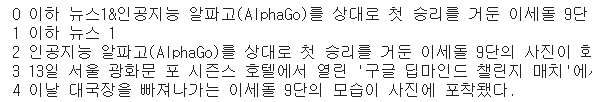

**"1 이하 뉴스 1"**  삭제된것 확인

In [68]:
def excluded_word_filter(excluded_words, texts):
    """
    특정 단어를 포함하는 문장 필터링
    """
    preprocessed_text = []
    for text in texts:
        include_flag = False
        for word in excluded_words:
            if word in text:
                include_flag = True
                break
        if not include_flag:
            preprocessed_text.append(text)
    return preprocessed_text

In [69]:
excluded_words = ["이하 뉴스1", "이 줄은 실제 뉴스"]

In [70]:
sents = excluded_word_filter(excluded_words, sents)
for i, sent in enumerate(sents):
    print(i, sent)

0 인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단의 사진이 화제다.
1 13일 서울 광화문 포시즌스 호텔에서 열린 '구글 딥마인드 챌린지 매치'에서 이세돌 9단은 알파고와의 제4국에서 승리했다.
2 이날 대국장을 빠져나가는 이세돌 9단의 모습이 사진에 포착됐다.
3 이세돌 9단은 상의 주머니에 양손을 넣고 옅은 미소를 지었다.
4 이 사진은 SNS에서 화제를 모았다.
5 오늘 알파고에게 승리하고 대국장 빠져나가는 이세돌이라는데ㅋㅋ 포토제닉ㅋㅋ 이대로 헐리웃 영화 만들어지고 포스터 소취요 - 조드윅 앓는 서린 2016년 3월 13일
6 대국을 마친 뒤, 이세돌 9단은 "한판 이겼는데 이렇게까지 축하를 받아보는 것은 처음"이라고 말했다.
7 이세돌 9단은 기자회견장에도 함박 웃음을 감추지 못했다.
8 여기에 태그가 있네요!
9 이곳에도 태그가 있구요
10 html은 태그로 이루어진 문서입니다.


In [71]:
def remove_stopwords(sents):
    #  큰 의미가 없는 불용어 정의
    stopwords = ['소취요', '-', '조드윅', '포스터', '앓는', '서린']
    preprocessed_text = []
    for sent in sents:
        sent = [w for w in sent.split(' ') if w not in stopwords]# 불용어 제거
        preprocessed_text.append(' '.join(sent))
    return preprocessed_text

In [72]:
sents_ = remove_stopwords(sents)
for i, sent in enumerate(sents_):
    print(i, sent)

0 인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단의 사진이 화제다.
1 13일 서울 광화문 포시즌스 호텔에서 열린 '구글 딥마인드 챌린지 매치'에서 이세돌 9단은 알파고와의 제4국에서 승리했다.
2 이날 대국장을 빠져나가는 이세돌 9단의 모습이 사진에 포착됐다.
3 이세돌 9단은 상의 주머니에 양손을 넣고 옅은 미소를 지었다.
4 이 사진은 SNS에서 화제를 모았다.
5 오늘 알파고에게 승리하고 대국장 빠져나가는 이세돌이라는데ㅋㅋ 포토제닉ㅋㅋ 이대로 헐리웃 영화 만들어지고 2016년 3월 13일
6 대국을 마친 뒤, 이세돌 9단은 "한판 이겼는데 이렇게까지 축하를 받아보는 것은 처음"이라고 말했다.
7 이세돌 9단은 기자회견장에도 함박 웃음을 감추지 못했다.
8 여기에 태그가 있네요!
9 이곳에도 태그가 있구요
10 html은 태그로 이루어진 문서입니다.


In [75]:
def min_max_filter(min_len, max_len, texts):#outlier에 대한 제거 -> 5번 같은 문장은 너무 길고, 이건 데이터 관점에서 outlier에 해당
    """
    문장을 최대, 최소 길이로 필터링합니다.
    """
    preprocessed_text = []
    for text in texts:
        if min_len < len(text) and len(text) < max_len:
            preprocessed_text.append(text)
    return preprocessed_text

최종 결과입니다! :-)   
처음에 비하면 많이 이뻐졌죠?   

In [76]:
sents_ = min_max_filter(min_len=5, max_len=70, texts=sents)
for i, sent in enumerate(sents_):
    print(i, sent)

0 인공지능 알파고(AlphaGo)를 상대로 첫 승리를 거둔 이세돌 9단의 사진이 화제다.
1 13일 서울 광화문 포시즌스 호텔에서 열린 '구글 딥마인드 챌린지 매치'에서 이세돌 9단은 알파고와의 제4국에서 승리했다.
2 이날 대국장을 빠져나가는 이세돌 9단의 모습이 사진에 포착됐다.
3 이세돌 9단은 상의 주머니에 양손을 넣고 옅은 미소를 지었다.
4 이 사진은 SNS에서 화제를 모았다.
5 대국을 마친 뒤, 이세돌 9단은 "한판 이겼는데 이렇게까지 축하를 받아보는 것은 처음"이라고 말했다.
6 이세돌 9단은 기자회견장에도 함박 웃음을 감추지 못했다.
7 여기에 태그가 있네요!
8 이곳에도 태그가 있구요
9 html은 태그로 이루어진 문서입니다.


## 유니코드 기반으로 filtering

1. 유니코드란?
> 유니코드(Unicode)는 전 세계의 모든 문자를 컴퓨터에서 일관되게 표현하고 다룰 수 있도록 설계된 산업 표준이며, 유니코드 협회(Unicode Consortium)가 제정한다. 또한 이 표준에는 ISO 10646 문자 집합, 문자 인코딩, 문자 정보 데이터베이스, 문자들을 다루기 위한 알고리즘 등을 포함하고 있다. - 위키피디아 -

* 한국인들은 주로 영어, 한국어, 숫자들에 익숙해 있습니다. 그런데 갑자기 러시아어, 아랍어, 불어와 같은 언어들을 처리해야 한다면?!
* 이런 고민을 유니코드를 사용하면 해결할 수 있습니다!
* 이번 장에서는 간단하게 유니코드를 python 프로그래밍에서 사용하는 방법을 배우도록 하겠습니다.

2. 유니코드 표현
* 유니코드는 16진수로 표현되어 있습니다. 간단한 예제를 통해 알아보겠습니다.
* 다양한 언어와 문자에 대한 유니코드는 https://jrgraphix.net/r/Unicode/0020-007F 이 사이트에서 쉽게 확인 가능합니다.

In [77]:
sentence = 'hello world'

print('* 원본 문장')
print(sentence)

print('\n* 10진수로 표현된 유니코드')
for w in sentence:
  print(ord(w), end=' ') # 문자 -> 10진수 변환

print('\n\n* 16진수로 표현된 유니코드')
for w in sentence:
  print(hex(ord(w)), end=' ') # 문자 -> 16진수 변환

* 원본 문장
hello world

* 10진수로 표현된 유니코드
104 101 108 108 111 32 119 111 114 108 100 

* 16진수로 표현된 유니코드
0x68 0x65 0x6c 0x6c 0x6f 0x20 0x77 0x6f 0x72 0x6c 0x64 

In [78]:
range_s = int('0370',16) # 그리스 문자 유니코드 범위
range_e = int('03FF',16) # 16진수 -> 10진수 변환

for i in range(range_s, range_e + 1): # 
  print(chr(i), end=' ')

Ͱ ͱ Ͳ ͳ ʹ ͵ Ͷ ͷ ͸ ͹ ͺ ͻ ͼ ͽ ; Ϳ ΀ ΁ ΂ ΃ ΄ ΅ Ά · Έ Ή Ί ΋ Ό ΍ Ύ Ώ ΐ Α Β Γ Δ Ε Ζ Η Θ Ι Κ Λ Μ Ν Ξ Ο Π Ρ ΢ Σ Τ Υ Φ Χ Ψ Ω Ϊ Ϋ ά έ ή ί ΰ α β γ δ ε ζ η θ ι κ λ μ ν ξ ο π ρ ς σ τ υ φ χ ψ ω ϊ ϋ ό ύ ώ Ϗ ϐ ϑ ϒ ϓ ϔ ϕ ϖ ϗ Ϙ ϙ Ϛ ϛ Ϝ ϝ Ϟ ϟ Ϡ ϡ Ϣ ϣ Ϥ ϥ Ϧ ϧ Ϩ ϩ Ϫ ϫ Ϭ ϭ Ϯ ϯ ϰ ϱ ϲ ϳ ϴ ϵ ϶ Ϸ ϸ Ϲ Ϻ ϻ ϼ Ͻ Ͼ Ͽ 

* 유니코드의 범위를 안다면 쉽게, 출력도 가능하다.
* 15번째 문자를 보면 세미콜론(;)과 유사하기로 악명을 떨친 그리스어 ; 가 있다.
* 유니코드를 이용한다면 쉽게 그리스어 ; 검출도 가능하다!

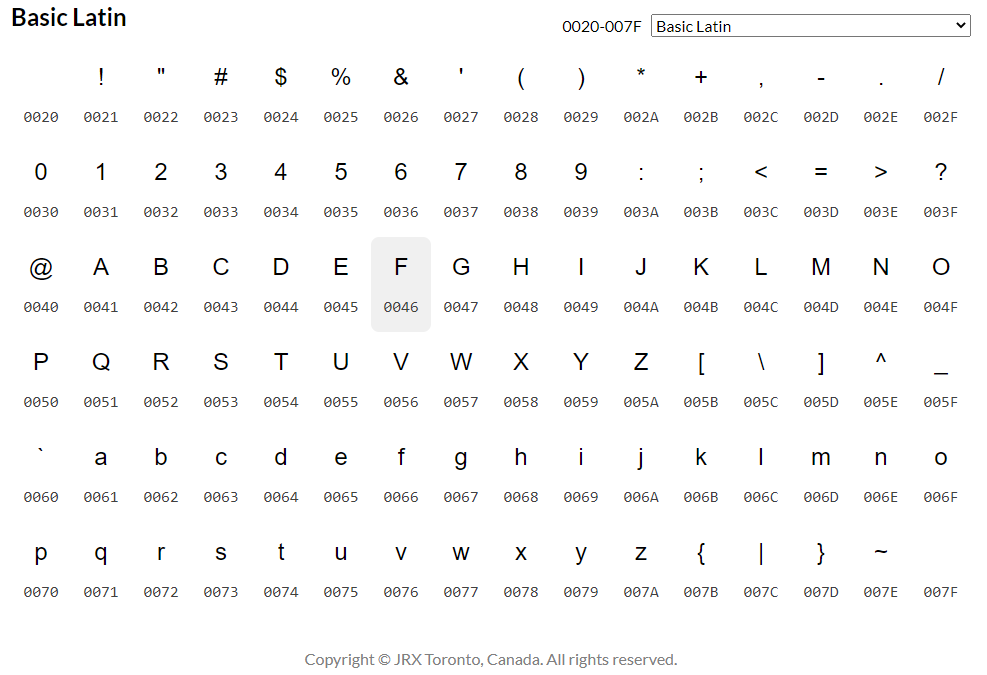

* hello world에 해당하는 유니코드들이 올바르게 표시 되었음을 확인할 수 있습니다.
* 위와 같이 해당하는 언어들의 유니코드 범위를 안다면, 쉽게 다양한 언어들을 구별 할 수 있습니다.

3. 유니코드 활용
* 이번 장에서는 10진수, 16진수, ord()함수를 이용해 다양한 언어로 구성된 hello world 문장 속에서 특정 언어를 제거해 보도록 하겠습니다.

In [79]:
def remove_language(range_s, range_e, sentence):
    a = int(range_s, 16) # 16진수 -> 10진수 변환
    b = int(range_e, 16)
    return_sentence = ''
    for i, w in enumerate(sentence):#sentence를 한글자 한글자 음절 단위로 관찰하면서 음절이 십진수로 변환시, 
        if a<= ord(w) and ord(w) <= b:  # 음절 단위로 사전에 정의한 유니코드 범위 내에 존재하는가
            continue
        return_sentence+=w
    return return_sentence

In [80]:
sentence = 'hello world 안녕하세요 세계 مرحبا بالعالم  Hallo Welt Chào thế giới Привет, мир'
# 영어 한국어 아랍어 독일어 베트남어 러시아어
# 구글번역기 이용
print(sentence)

hello world 안녕하세요 세계 مرحبا بالعالم  Hallo Welt Chào thế giới Привет, мир


In [81]:
print(remove_language('0600','06FF',sentence)) # 아랍어 제거, 아랍어의 유니코드 범위 0600 ~ 06FF

hello world 안녕하세요 세계    Hallo Welt Chào thế giới Привет, мир


In [82]:
print(remove_language('0400','04FF',sentence)) # 러시아어 제거, 러시아 키릴 문자의 유니코드 범위 0400 ~ 04FF

hello world 안녕하세요 세계 مرحبا بالعالم  Hallo Welt Chào thế giới , 


* 영어를 제거하려면 어떻게 해야할까?
* 위에서 소개한 유니코드 사이트에서 Basic Latin 0020 ~ 007F 범위에 대소문자 알파벳이 있음을 알 수 있다. 

In [83]:
print(remove_language('0020','007F',sentence)) # 알파벳 제거, 알파벳의 유니코드 범위 0020 ~ 007F

안녕하세요세계مرحبابالعالمàếớПриветмир


* 주의해야할 점을 눈치 채셨나요?
* 먼저 영어, 독일어, 베트남어 일부는 같은 유니코드 체계를 이용해 표현됩니다.-> ex)다른언어인데, 알파벳을 사용하니깐, 유니코드 범위는 같음
* 두번째로, 유니코드 범위에 공백을 표현하는 유니코드가 속해 있을 수 있어, 원하지 않게 띄어쓰기를 제거하게 됩니다.
* 이런 점들을 고려해, 독립된 유니코드를 사용하는 언어인지, 유니코드에서 띄어쓰기 혹은 특수문자들에 대해서도 원하는 목적을 위해 적절히 예외처리를 해주셔야합니다.